### Домашняя работа "Работа с переменными"

In [23]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df = data.copy()

Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США.

- CRIM - уровень преступности на душу населения
- ZN - доля земли под жилую застройку,
- INDUS - доля акров, не относящихся к розничной торговле.
- CHAS - фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота 
- RM - среднее количество комнат в доме
- AGE - доля занимаемых владельцами единиц, построенных до 1940 г.
- DIS - взвешенное расстояние до пяти бостонских центров занятости
- RAD - индекс доступности радиальных автомобильных дорог
- TAX - полная ставка налога на имущество за 10 000 долларов США.
- PTRATIO - соотношение учеников и учителей по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля афроамериканцев по городам
- LSTAT - % более населения низкого соц статуса
- MEDV - Средняя стоимость домов в 1000 долларов

In [4]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Отсутствуют пропущенные значения

In [5]:
data.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


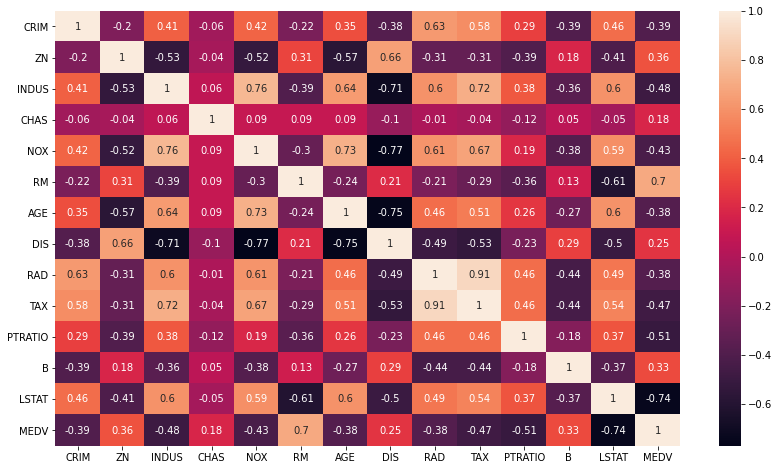

In [6]:
rcParams['figure.figsize'] = 14,8

correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True);

Посмотрев на матрицу корреляции, мы можем увидеть, что RM имеет сильную положительную корреляцию с MEDV (0,7), тогда как LSTAT имеет высокую отрицательную корреляцию с MEDV (-0,74) 

Важным моментом при выборе признаков для модели линейной регрессии является проверка на мультиколинейность. Характеристики RAD , TAX имеют соотношение 0,91 . Эти пары функций сильно коррелированы друг с другом. Это может повлиять на модель. То же самое касается функций DIS и AGE, у которых соотношение составляет -0,75 .

Распределение цен на жилье по LTSTAT и RM


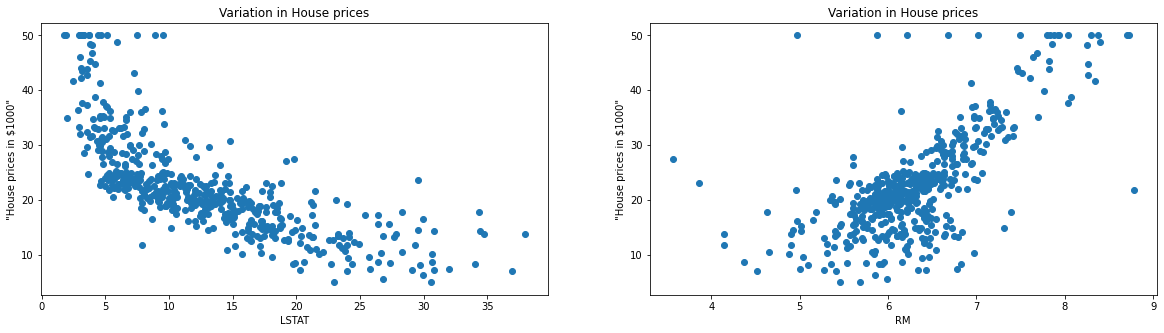

In [7]:
plt.figure(figsize=(20, 5))

print('{}'.format('Распределение цен на жилье по LTSTAT и RM'))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')


#### Проверим данные на выбросы

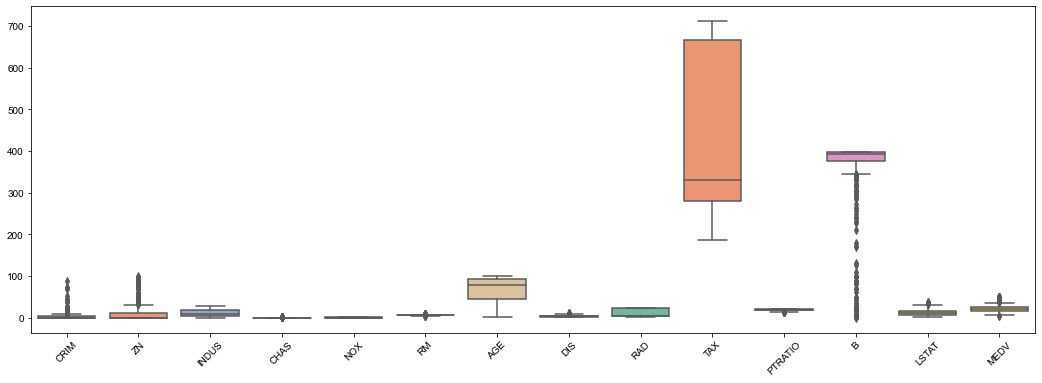

In [8]:
rcParams['figure.figsize'] = 18,6

plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")

sns.boxplot(data = df, palette="Set2", orient = 'v');

In [9]:
def outliers(data):
    q25, q75 =data.quantile([.25, .75])
    iqr = q75-q25
    return data.between(q25-1.5*iqr, q75+1.5*iqr)

In [10]:
outlier_threshold  = 0.1
to_exclude_outlier_cols = []
print('{:<8}  {}'.format('Признак', 'Выброс'))
for col in df.drop('MEDV', 1).columns:
    outlier_share = 1- outliers(df[col]).mean()    
    print('{:<8}  - {:.2%}'.format(col, outlier_share))
    if outlier_share < outlier_threshold:
        to_exclude_outlier_cols.append(col)

Признак   Выброс
CRIM      - 13.04%
ZN        - 13.44%
INDUS     - 0.00%
CHAS      - 6.92%
NOX       - 0.00%
RM        - 5.93%
AGE       - 0.00%
DIS       - 0.99%
RAD       - 0.00%
TAX       - 0.00%
PTRATIO   - 2.96%
B         - 15.22%
LSTAT     - 1.38%


In [11]:
df.shape

(506, 14)

#### Удалим выбросы

In [12]:
df = df[df[to_exclude_outlier_cols].fillna(0).apply(outliers).all(1)]

In [13]:
df.shape

(424, 14)

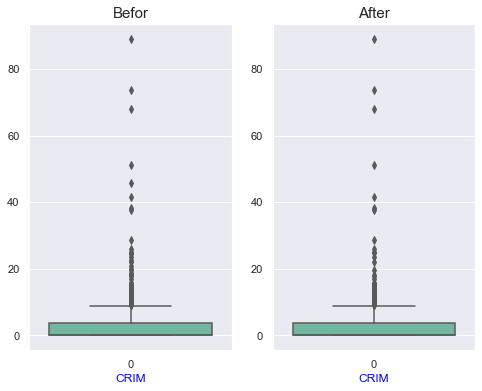

In [14]:
rcParams['figure.figsize'] = 8,6

plt.subplot(1, 2, 1)
plt.title('Befor', fontsize=15)
sns.boxplot(data = data['CRIM'], palette="Set2", orient = 'v');
plt.xlabel('CRIM', fontsize=12, color='blue');

plt.subplot(1, 2, 2)
plt.title('After', fontsize=15)
sns.boxplot(data = df['CRIM'], palette="Set2", orient = 'v');
plt.xlabel('CRIM', fontsize=12, color='blue');

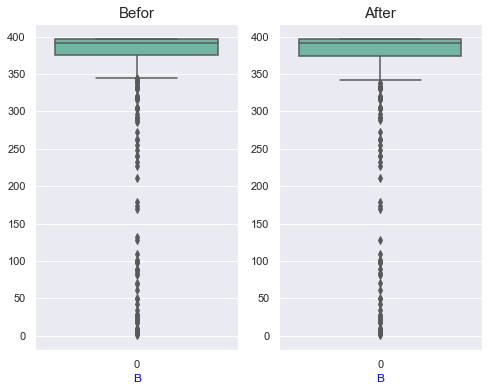

In [15]:
rcParams['figure.figsize'] = 8,6

plt.subplot(1, 2, 1)
plt.title('Befor', fontsize=15)
sns.boxplot(data = data['B'], palette="Set2", orient = 'v');
plt.xlabel('B', fontsize=12, color='blue');

plt.subplot(1, 2, 2)
plt.title('After', fontsize=15)
sns.boxplot(data = df['B'], palette="Set2", orient = 'v');
plt.xlabel('B', fontsize=12, color='blue');

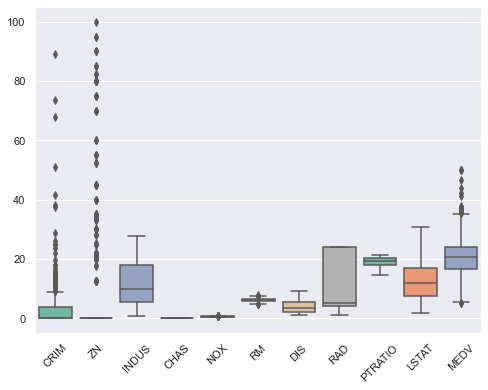

In [16]:
plt.xticks(rotation=45)
rcParams['figure.figsize'] = 20,6
sns.set_theme(style="darkgrid")
sns.boxplot(data = df.drop(['TAX', 'B', 'AGE'],1), palette="Set2", orient = 'v');

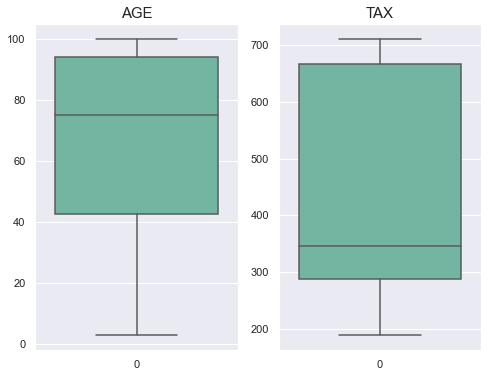

In [17]:
rcParams['figure.figsize'] = 8,6

plt.subplot(1, 2, 1)
plt.title('AGE', fontsize=15)
sns.boxplot(data = df['AGE'], palette="Set2", orient = 'v');

plt.subplot(1, 2, 2)
plt.title('TAX', fontsize=15)
sns.boxplot(data = df['TAX'], palette="Set2", orient = 'v');

In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Сделаем погноз для:   
features = ['LSTAT', 'RM']  
target = df['MEDV']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features], df['MEDV'], test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
lr = LinearRegression()

lr.fit(X_train_std, y_train)
preds = lr.predict(X_test_std)

rmse = round((np.sqrt(mean_squared_error(y_test, preds))),4)
r2 = round(lr.score(X_test_std, y_test),4)


print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

Root Mean Squared Error: 4.9192
R^2: 0.5962


Очень низкий коэффициент детерминации

Построим модель для всего датасета

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('MEDV', 1), df['MEDV'], test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [27]:
lr = LinearRegression()

lr.fit(X_train_std, y_train)
preds = lr.predict(X_test_std)

rmse = round((np.sqrt(mean_squared_error(y_test, preds))),4)
r2 = round(lr.score(X_test_std, y_test),4)


print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

Root Mean Squared Error: 4.3359
R^2: 0.6863


коэффициент детерминации немного увеличился